In [64]:
import pandas as pd
import numpy as np  #for mathematical calculations
import seaborn as sns  #For data visulatization
import matplotlib.pyplot as plt   #for plotting graphs
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [65]:
train = pd.read_csv('train_ctrUa4K.csv')
test = pd.read_csv('test_lAUu6dG.csv')
test_original=test.copy()

In [66]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Exploratory Data Analysis (EDA)

https://courses.analyticsvidhya.com/courses/take/loan-prediction-practice-problem-using-python/texts/6119436-univariate-analysis

https://towardsdatascience.com/an-extensive-guide-to-exploratory-data-analysis-ddd99a03199e

In [67]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [68]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [69]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [70]:
train.shape

(614, 13)

In [71]:
test.shape

(367, 12)

Once I knew all of the variables in the dataset, I wanted to get a better understanding of the different values for each variable.

In [72]:
train.nunique(axis=0)

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

.describe() summarizes the count, mean, standard deviation, min, and max for numeric variables. The code that follows this simply formats each row to the regular format and suppresses scientific notation 

In [73]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# Univariate Analysis

<AxesSubplot:>

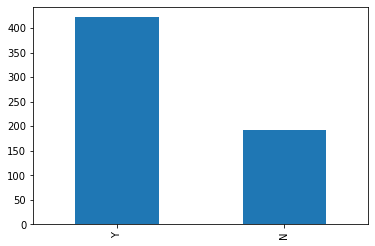

In [74]:
train['Loan_Status'].value_counts().plot.bar()

# Independant variable (Categorical)

https://stackoverflow.com/questions/3584805/in-matplotlib-what-does-the-argument-mean-in-fig-add-subplot111

fig.add_subplot(ROW,COLUMN,POSITION)

ROW=number of rows
COLUMN=number of columns
POSITION= position of the graph you are plotting

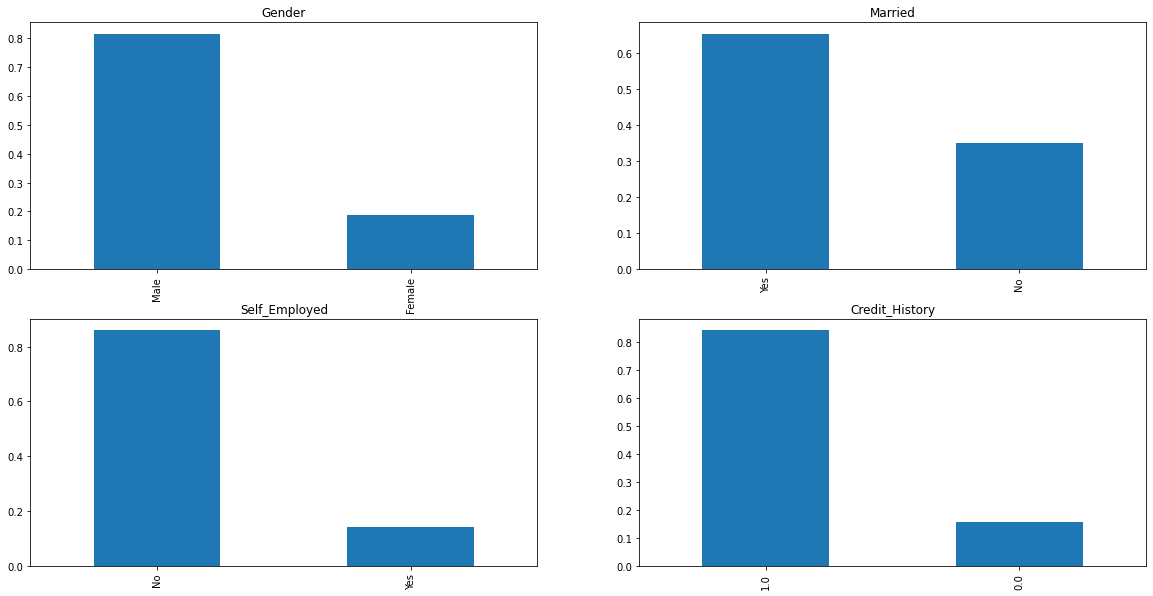

In [75]:
plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Gender')
plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Married')
plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Self_Employed')
plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Credit_History')
plt.show()



It can be inferred from the above bar plots that:
        
        80% applicants in the dataset are male
        Arond 65% of the applicatns in the dataset area married
        Arond 15% are self emplooyed
        Around 85% have repaired their debts

# Independant variable (Categorical)

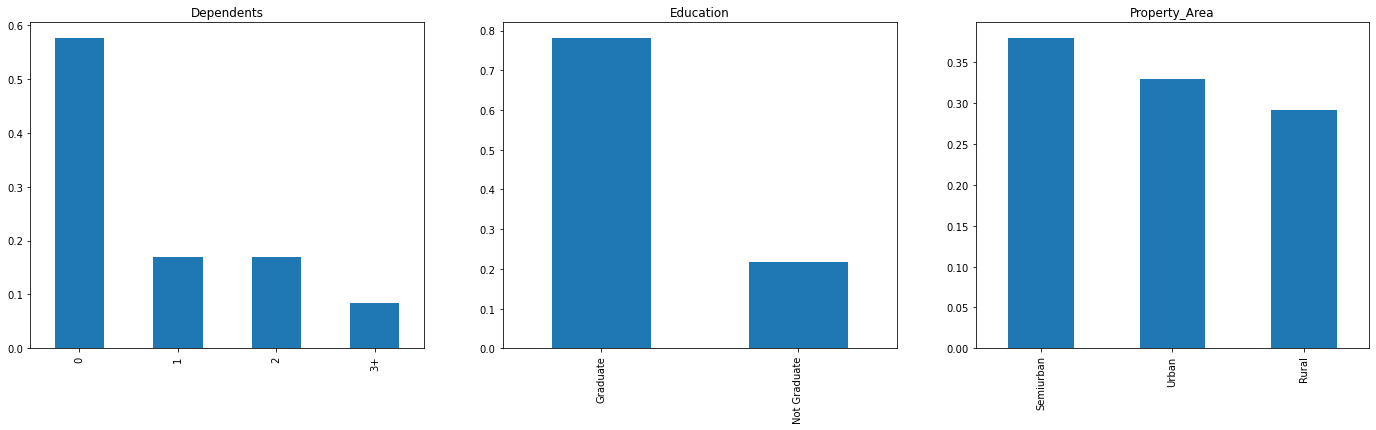

In [76]:
plt.figure(1)
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6),title='Dependents')
plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(figsize=(24,6),title='Education')
plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(figsize=(24,6),title='Property_Area')
plt.show()

# Independant variable (Numerical)

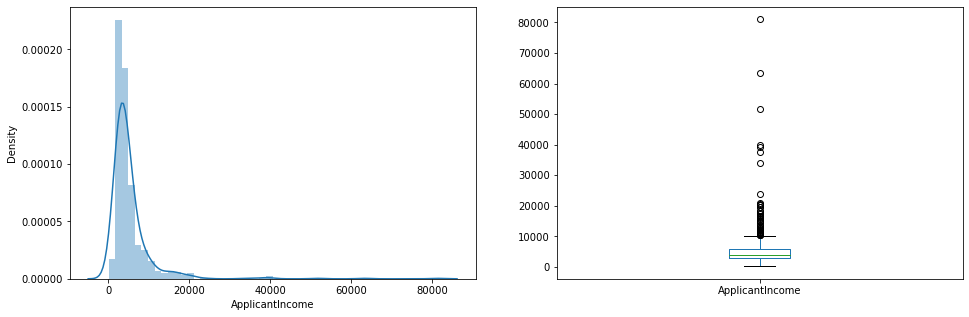

In [77]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome'])
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

It can be inferred that most of the dta in the distribution of applicatn income is towards left which means it is not normally distributed
we will try to make it normal in later section as algorithms works better if the dat is normally distributed

The boxplot confirms the presence of a lot of outliers/extremes values. This can be attributed to the income disparity in the society.
Part of this can be driven by the fact that we are looking at the people with different education levels. Let us segregate them by education:
    


NameError: name 'Text' is not defined

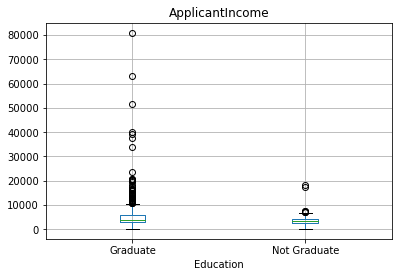

In [78]:
train.boxplot(column='ApplicantIncome', by='Education') 
plt.suptitle("")

Text(0.5,0.98,'')

Coapplicant Income Distribution

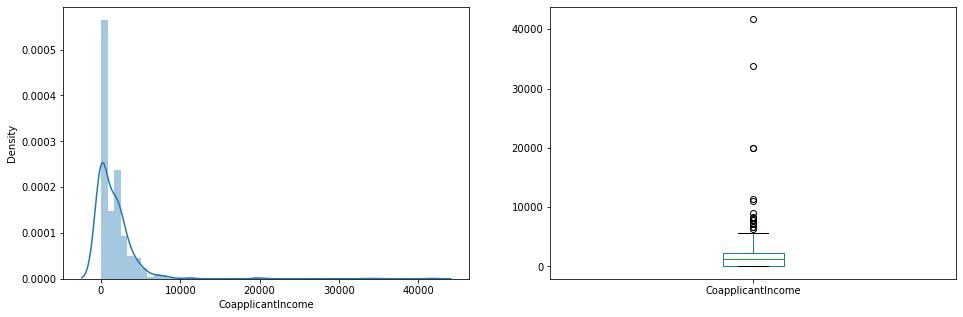

In [79]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['CoapplicantIncome'])
plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()

LoanAmount Distribution

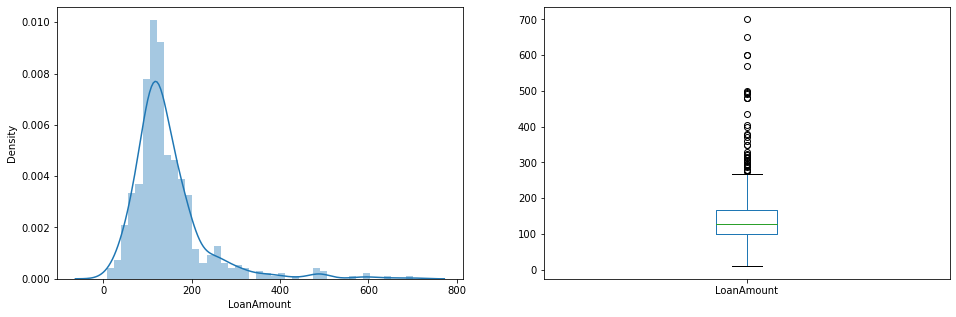

In [80]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['LoanAmount'])
plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

We can see a lot of outliers in this variable and the distribution is normal

# Bivariate Analysis

The hypothesis of getting better probabiltiy of loan approval that we have:
    Applicants with high income 
    Applicant who repaid their previouse debts
    Less loan amount 
    lesser amoutn to be paid monthly to repay the loan
    
We will use vibariate analysis of individual variable with respect to target variable

# Categorical Independent variable vs Target variable

<AxesSubplot:xlabel='Gender'>

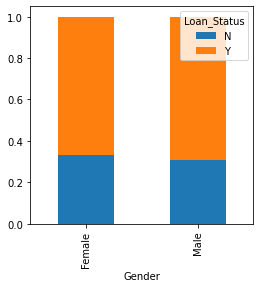

In [81]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))

<AxesSubplot:xlabel='Married'>

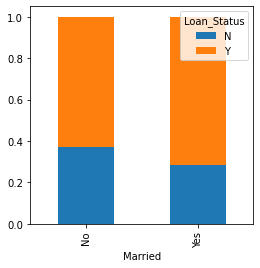

In [82]:
Married=pd.crosstab(train['Married'],train['Loan_Status'])
Married.div(Married.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))

<AxesSubplot:xlabel='Dependents'>

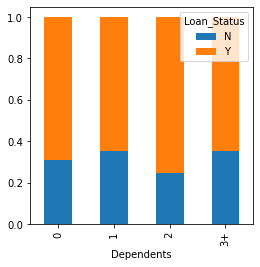

In [83]:
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))

<AxesSubplot:xlabel='Education'>

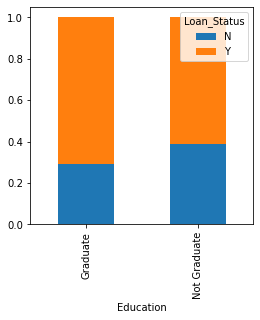

In [84]:
Education=pd.crosstab(train['Education'],train['Loan_Status'])
Education.div(Education.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))

<AxesSubplot:xlabel='Self_Employed'>

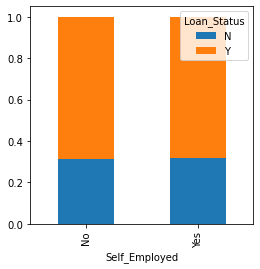

In [85]:
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))

<AxesSubplot:xlabel='Credit_History'>

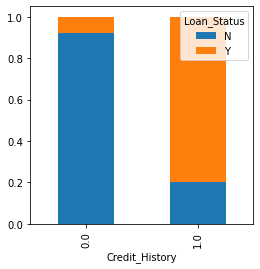

In [86]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))

<AxesSubplot:xlabel='Property_Area'>

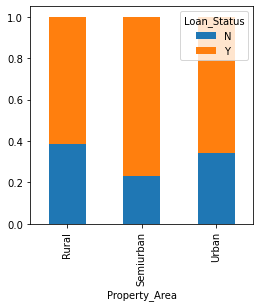

In [87]:
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))

It seems people with credit history as 1 are more likely to get their loans
People living in Semiurban area have better probabilty of getting loan approved

# Numerical Independent variable vs Target variable

<AxesSubplot:xlabel='Loan_Status'>

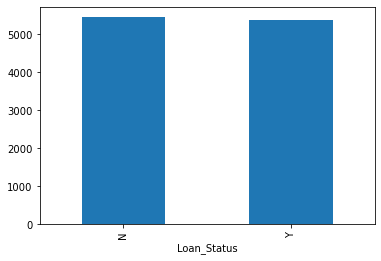

In [88]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

We dont see any change in the mean income. SO lets make bins for the applicaotn income variable based on the values in it and anlayze the corresponding
loan status for each bin.

Text(0, 0.5, 'Percentage')

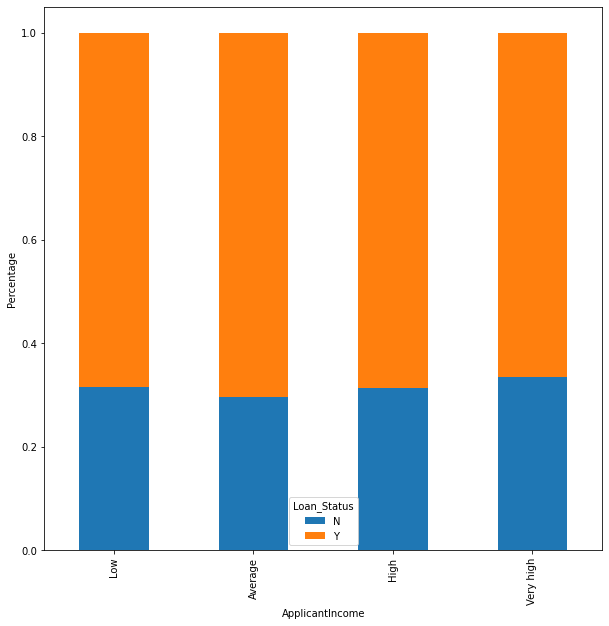

In [89]:
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High','Very high']
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(10,10))
plt.xlabel('ApplicantIncome')
plt.ylabel('Percentage')

It can be inferred that Applicant income does not affect the chances of loan approval which contradicts our hypothesis

Text(0, 0.5, 'Percentage')

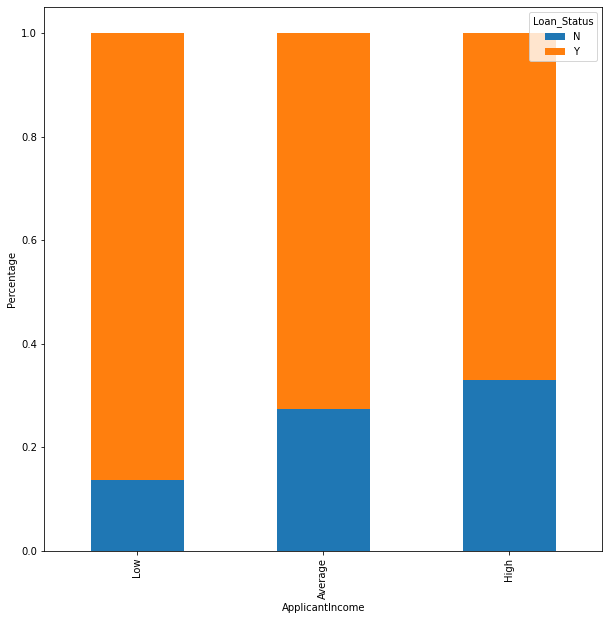

In [90]:
bins=[0,1000,3000,42000] 
group=['Low','Average','High']
train['Coapplicant_Income_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(10,10))
plt.xlabel('ApplicantIncome')
plt.ylabel('Percentage')

It shows if coapplicant income is less then the chance is high and this doesnt look right. The possible reason may be that most of the a
applicants dont have any coapplicant so the coapplicant income is zero and hence the loan approval is not depedant on it. so we can
make new variable in wich we will combine the applicant and coapplicant's income

Text(0, 0.5, 'Percentage')

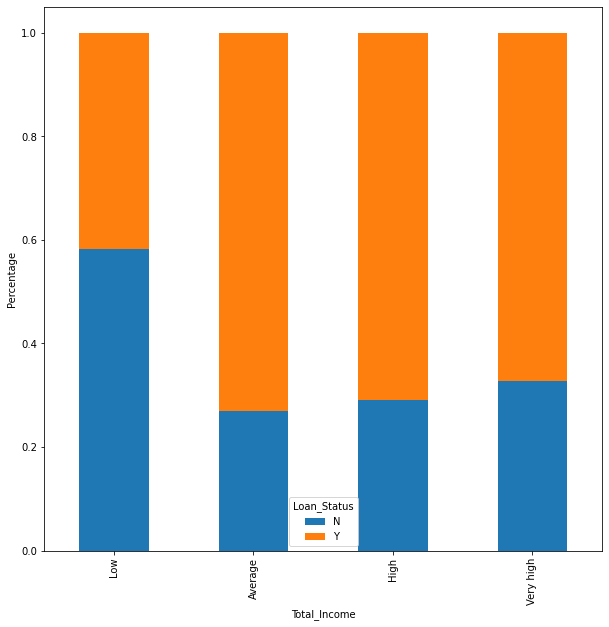

In [91]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High','Very high']
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(10,10))
plt.xlabel('Total_Income')
plt.ylabel('Percentage')

Now we can clearly see there is a relation where low total income of a applicant has the less possiblity of getting approved

Lets drop the bins which we created for EDA. We will change the 3+ in dependents variable to 3. ALso we will replace N and Y to 0 and 1 respectively so that
we can find its correlation with numberical variables. One more reason to do so is few models like logistic regression only takes
numeric values as input

In [92]:
train=train.drop(['Income_bin','Coapplicant_Income_bin','Total_Income_bin','Total_Income'],axis=1)
train['Dependents'].replace('3+',3,inplace=True)
test['Dependents'].replace('3+',3,inplace=True)
train['Loan_Status'].replace('N',0,inplace=True)
train['Loan_Status'].replace('Y',1,inplace=True)

# Correlation Matrix (Heat map)

<AxesSubplot:>

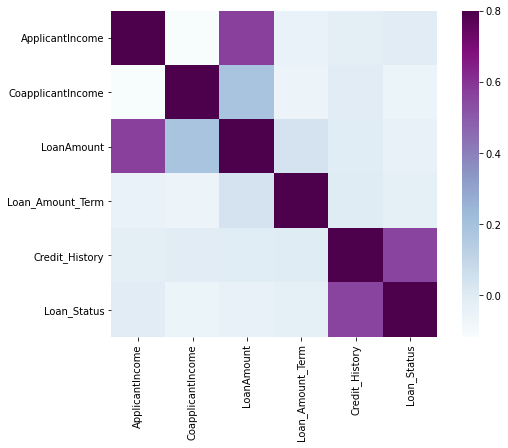

In [93]:
matrix=train.corr()
f,ax=plt.subplots(figsize=(9,6))
sns.heatmap(matrix, vmax=0.8, square=True, cmap="BuPu")

Heatmaps visualize data through variatios in coloring. The variable with darker color means their correlation is more

# Missing Value & Outlier

In [94]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

We can consider these methods to fill the missing values:
    For numerical: imputation using mean or median
    For categorical: imputation using mode

In [95]:
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
train['Married'].fillna(train['Married'].mode()[0],inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)


For Loan_amount term we will look at the value count

In [96]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

It seems 360 Term repeats most so we will use mode  for this vairable for replacement of missing values

In [97]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)

For LoanAmount variable we will use median instead of mean as we saw earlier that this variable consists of a lot of outlier. The mean 
will be affected by outlier

In [98]:
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)

In [99]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Filling missing value in test dataset

In [100]:
test['Gender'].fillna(test['Gender'].mode()[0],inplace=True)
test['Married'].fillna(test['Married'].mode()[0],inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0],inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0],inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0],inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0],inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].median(),inplace=True)

In [101]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

# Outlier Treatment

Outliers ofter has a significant effect on the mean and standard deviation and hence affecting the distribution. Due to the outlier
in the data in LoanAmount is at the left and the right tail is longer and this is called right skewness. One way to remove
the skewness is by doing the log transformation. As we take log transformation, it does not affect the smaller values much but reduces
the larger values. So we get a distribution similiar to normal distribution

In [102]:
train['LoanAmount_log']=np.log(train['LoanAmount'])
test['LoanAmount_log']=np.log(test['LoanAmount'])

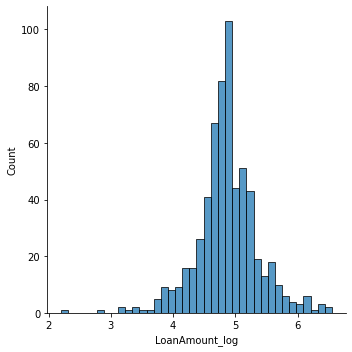

In [103]:
sns.displot(train['LoanAmount_log'])

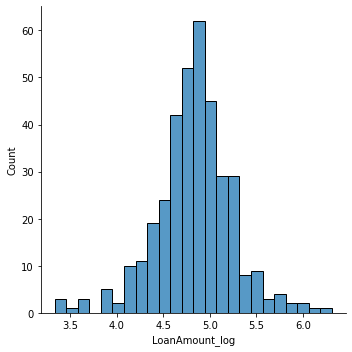

In [104]:
sns.displot(test['LoanAmount_log'])

# Model Building

Lets first drop the Loan_Id as it doesnt have any relation to the response vairable Loan_status

In [105]:
train=train.drop('Loan_ID',axis=1)
test=test.drop('Loan_ID',axis=1)

In [106]:
X=train.drop('Loan_Status',axis=1)
y=train['Loan_Status']

In [107]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

We will make dummy variables for the categorical variables. Dummy variables turns categorical variables into a series of 0 and 1, making
them lot easier to quanitify and compare. Let us understand the process of dummies first"

    Consider the Gender variable. It has two classes, Male and Female
    As logistic regression takes only the numerical values as input, we have to change male and female into numerical value
    Once we apply dummies to this variable, it will convert the Gender variable into two variables (Gener_male, Gender_Female)
    Gender_male will have a vlaue of 0 and Gender_female will have 1

In [108]:
X=pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)


In [109]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [229]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model=LogisticRegression()
model.fit(X_train,y_train)


LogisticRegression()

# Predict with validation set and measure accuracy

In [230]:
pred=model.predict(X_test)
accuracy=accuracy_score(y_test,pred)
print(accuracy)

0.8054054054054054


Lets make prediciton with real test dataset

In [231]:
pred_test=model.predict(test)

Import the submission file which we have to submit on the solution checker

In [232]:
submission=pd.read_csv('sample_submission_49d68Cx.csv')

In [233]:
submission.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


We only need the Load_Id and the corresponding Load_Status for the final submission. We will fill these columns with the Loan_ID of test data set
and the predicitons tht we made pred_test respectively

In [234]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

Remember we need prediction in Y and N. But from the model prediciton we got 1 and 0. Lets convert 1 and 0 to Y and N

In [235]:
submission['Loan_Status'].replace('1'=='Y', '0'=='N', inplace=True)

In [236]:
submission

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1
...,...,...
362,LP002971,1
363,LP002975,1
364,LP002980,1
365,LP002986,1


In [237]:
pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv('logistic.csv')

# Stratified Kfold crossvalidation

In [238]:
from sklearn.model_selection import StratifiedKFold

In [239]:
i=1
skf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in skf.split(X,y):
    print('\n{} of kfold {}'.format(i,skf.n_splits))
    Xtr,Xvl=X.iloc[train_index],X.iloc[test_index]
    ytr,yvl=y.iloc[train_index],y.iloc[test_index]
    model=LogisticRegression(random_state=1)
    model.fit(Xtr,ytr)
    pred_test=model.predict(Xvl)
    score=accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1
    



1 of kfold 5
accuracy_score 0.8048780487804879

2 of kfold 5
accuracy_score 0.8373983739837398

3 of kfold 5
accuracy_score 0.7804878048780488

4 of kfold 5
accuracy_score 0.7886178861788617

5 of kfold 5
accuracy_score 0.7950819672131147


In [253]:
pred_test=model.predict(test)
pred=model.predict_proba(Xvl)[:,1]
pred

array([0.75160396, 0.86474615, 0.78924447, 0.88740573, 0.91789595,
       0.91776837, 0.68196132, 0.76414002, 0.85119203, 0.94295818,
       0.6853461 , 0.77117905, 0.87490681, 0.27303038, 0.70144354,
       0.84428562, 0.91533745, 0.91165282, 0.75324364, 0.93869329,
       0.50360272, 0.16776514, 0.77537886, 0.71285231, 0.7028652 ,
       0.52700201, 0.5082255 , 0.75476902, 0.90312015, 0.86938208,
       0.28290256, 0.10124552, 0.6874362 , 0.65016578, 0.7711744 ,
       0.71537525, 0.58249758, 0.85976602, 0.73827063, 0.05156472,
       0.64842155, 0.95782778, 0.93043892, 0.13408874, 0.55715018,
       0.89541822, 0.8844193 , 0.77255145, 0.347913  , 0.77140242,
       0.86936302, 0.50457141, 0.87650616, 0.92906194, 0.92752536,
       0.67121376, 0.78362056, 0.77428743, 0.05048102, 0.8414097 ,
       0.86799405, 0.89168649, 0.80580378, 0.90028328, 0.58688424,
       0.90128664, 0.6584957 , 0.73627276, 0.56214773, 0.66831906,
       0.90456937, 0.86979202, 0.62618   , 0.67956004, 0.90249

In [256]:
pred.shape

(122,)

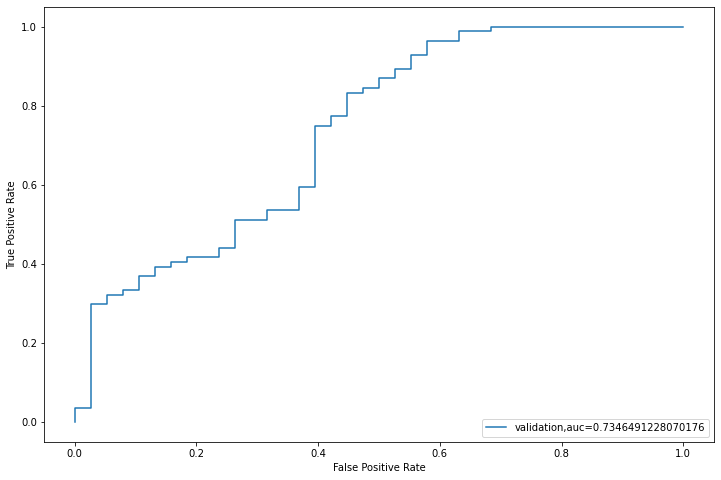

In [261]:
from sklearn import metrics
fpr,tpr,_=metrics.roc_curve(yvl,pred)
auc=metrics.roc_auc_score(yvl,pred)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label='validation,auc='+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

We got an accuracy of 0.73. Now we will try to improve this accuracy using differen approach

# Feature Engineering

Based on the domain knowledge we can come up with new features that might affect the target variable. We will creat the following:
    Total Income: As discussed during bivariate analysis we will combine the applicant income and Coapplicant income. I fth etotal income is
        high, chances of loa approval might also be high
        
        EMI: EMI is the monthly amount to be paid by the applicant to repay the loan. Idea is who has high EMI finds hard time to pay back the loan
            
        Balance Income: This is the income left after the EMI has been paid   

In [110]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']

<AxesSubplot:xlabel='Total_Income', ylabel='Density'>

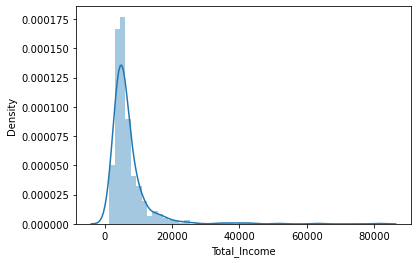

In [111]:
sns.distplot(train['Total_Income'])

It is shifted towared left mean right skewed. Lets take log transformation to make it normal distribution

<AxesSubplot:xlabel='Total_Income_log', ylabel='Density'>

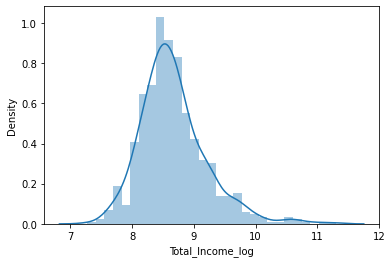

In [112]:
train['Total_Income_log']=np.log(train['Total_Income'])
test['Total_Income_log']=np.log(test['Total_Income'])
sns.distplot(train['Total_Income_log'])

In [113]:
train.head()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,LoanAmount_log,Gender_Female,Gender_Male,Married_No,...,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Total_Income,Total_Income_log
0,5849,0.0,128.0,360.0,1.0,1,4.852030,0,1,1,...,0,1,0,1,0,0,0,1,5849.0,8.674026
1,4583,1508.0,128.0,360.0,1.0,0,4.852030,0,1,0,...,0,1,0,1,0,1,0,0,6091.0,8.714568
2,3000,0.0,66.0,360.0,1.0,1,4.189655,0,1,0,...,0,1,0,0,1,0,0,1,3000.0,8.006368
3,2583,2358.0,120.0,360.0,1.0,1,4.787492,0,1,0,...,0,0,1,1,0,0,0,1,4941.0,8.505323
4,6000,0.0,141.0,360.0,1.0,1,4.948760,0,1,1,...,0,1,0,1,0,0,0,1,6000.0,8.699515


In [114]:
test.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Total_Income,Total_Income_log
0,5720,0,110.0,360.0,1.0,4.700480,0,1,0,1,...,0,1,0,1,0,0,0,1,5720,8.651724
1,3076,1500,126.0,360.0,1.0,4.836282,0,1,0,1,...,0,1,0,1,0,0,0,1,4576,8.428581
2,5000,1800,208.0,360.0,1.0,5.337538,0,1,0,1,...,1,1,0,1,0,0,0,1,6800,8.824678
3,2340,2546,100.0,360.0,1.0,4.605170,0,1,0,1,...,1,1,0,1,0,0,0,1,4886,8.494129
4,3276,0,78.0,360.0,1.0,4.356709,0,1,1,0,...,0,0,1,1,0,0,0,1,3276,8.094378


In [115]:
train['EMI']=train['LoanAmount']/train['Loan_Amount_Term']
test['EMI']=test['LoanAmount']/test['Loan_Amount_Term']

<AxesSubplot:xlabel='EMI', ylabel='Density'>

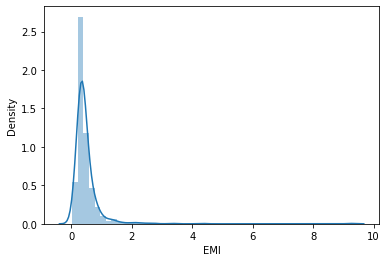

In [116]:
sns.distplot(train['EMI'])

<AxesSubplot:xlabel='Balance_Income', ylabel='Density'>

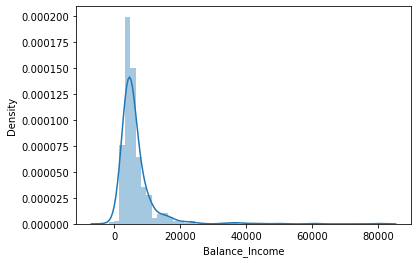

In [117]:
train['Balance_Income']=train['Total_Income']-train['EMI']*1000
test['Balance_Income']=test['Total_Income']-test['EMI']*1000
sns.distplot(train['Balance_Income'])

Multiply with 1000 to make the units equal

Lets now  drop the variables which we used to creat these new features. Reason for doing this is, the correlation between those old features
 and these new features will be very high and logistic refression assumes that the variables are not highly correlated. We also want
    to remove the noise from the dataaset, so removing correlated featuers will help in reducing the noise too

In [118]:
train.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'],axis=1)
test.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'],axis=1)

,Credit_History,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,Dependents_0,Dependents_1,Dependents_2,...,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Total_Income,Total_Income_log,EMI,Balance_Income
0,1.0,4.700480,0,1,0,1,0,1,0,0,...,0,1,0,0,0,1,5720,8.651724,0.305556,5414.444444
1,1.0,4.836282,0,1,0,1,0,0,1,0,...,0,1,0,0,0,1,4576,8.428581,0.350000,4226.000000
2,1.0,5.337538,0,1,0,1,0,0,0,1,...,0,1,0,0,0,1,6800,8.824678,0.577778,6222.222222
3,1.0,4.605170,0,1,0,1,0,0,0,1,...,0,1,0,0,0,1,4886,8.494129,0.277778,4608.222222
4,1.0,4.356709,0,1,1,0,0,1,0,0,...,1,1,0,0,0,1,3276,8.094378,0.216667,3059.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,1.0,4.727388,0,1,0,1,1,0,0,0,...,1,0,1,0,0,1,5786,8.663196,0.313889,5472.111111
363,1.0,4.744932,0,1,0,1,0,1,0,0,...,0,1,0,0,0,1,4867,8.490233,0.319444,4547.555556
364,1.0,4.836282,0,1,1,0,0,1,0,0,...,0,1,0,0,1,0,5243,8.564649,0.350000,4893.000000
365,1.0,5.062595,0,1,0,1,0,1,0,0,...,0,1,0,1,0,0,7393,8.908289,0.438889,6954.111111


In [119]:
train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,LoanAmount_log,Gender_Female,Gender_Male,Married_No,...,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Total_Income,Total_Income_log,EMI,Balance_Income
0,5849,0.0,128.0,360.0,1.0,1,4.852030,0,1,1,...,0,1,0,0,0,1,5849.0,8.674026,0.355556,5493.444444
1,4583,1508.0,128.0,360.0,1.0,0,4.852030,0,1,0,...,0,1,0,1,0,0,6091.0,8.714568,0.355556,5735.444444
2,3000,0.0,66.0,360.0,1.0,1,4.189655,0,1,0,...,0,0,1,0,0,1,3000.0,8.006368,0.183333,2816.666667
3,2583,2358.0,120.0,360.0,1.0,1,4.787492,0,1,0,...,1,1,0,0,0,1,4941.0,8.505323,0.333333,4607.666667
4,6000,0.0,141.0,360.0,1.0,1,4.948760,0,1,1,...,0,1,0,0,0,1,6000.0,8.699515,0.391667,5608.333333


In [121]:
test.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Total_Income,Total_Income_log,EMI,Balance_Income
0,5720,0,110.0,360.0,1.0,4.700480,0,1,0,1,...,0,1,0,0,0,1,5720,8.651724,0.305556,5414.444444
1,3076,1500,126.0,360.0,1.0,4.836282,0,1,0,1,...,0,1,0,0,0,1,4576,8.428581,0.350000,4226.000000
2,5000,1800,208.0,360.0,1.0,5.337538,0,1,0,1,...,0,1,0,0,0,1,6800,8.824678,0.577778,6222.222222
3,2340,2546,100.0,360.0,1.0,4.605170,0,1,0,1,...,0,1,0,0,0,1,4886,8.494129,0.277778,4608.222222
4,3276,0,78.0,360.0,1.0,4.356709,0,1,1,0,...,1,1,0,0,0,1,3276,8.094378,0.216667,3059.333333


# Data Preparation for AWS instaces

In [126]:
#AWS Sagemaker does not require the headers during the training process and also the target column should be the first
# column in the data frame. for test data we need the headers


X=train.drop('Loan_Status',axis=1)
y=train['Loan_Status']

train_x, val_x, train_y, val_y = train_test_split(X,y, test_size = 0.2, random_state=100)
train_y = pd.DataFrame(train_y)
val_y = pd.DataFrame(val_y)

#concatenate split training features
train_updated = train_y.join(train_x)

#concatenate split validation features
val_updated = val_y.join(val_x)

columns = train_updated.columns

#import the new updated train datasets
train_updated.to_csv('Train_final.csv', index=False, header=False, columns=columns)
val_updated.to_csv('Val_final.csv',index=False, header=False, columns=columns)

#import the new updated test datasets
test.to_csv('Test_final.csv', index=False)

# Model Builing: Logistic Regression, Decision Tree, Random Forest, XGBoost

In [58]:
X=train.drop('Loan_Status',axis=1)
y=train['Loan_Status']

# Logistic Regresson:

In [276]:
i=1
skf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in skf.split(X,y):
    print('\n{} of kfold {}'.format(i,skf.n_splits))
    Xtr,Xvl=X.iloc[train_index],X.iloc[test_index]
    ytr,yvl=y.iloc[train_index],y.iloc[test_index]
    model=LogisticRegression(random_state=1)
    model.fit(Xtr,ytr)
    pred_test=model.predict(Xvl)
    score=accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1


1 of kfold 5
accuracy_score 0.7154471544715447

2 of kfold 5
accuracy_score 0.7967479674796748

3 of kfold 5
accuracy_score 0.7560975609756098

4 of kfold 5
accuracy_score 0.7723577235772358

5 of kfold 5
accuracy_score 0.7131147540983607


The mean validation accuracy is 0.75

# Decision Tree:

In [278]:
from sklearn.tree import DecisionTreeClassifier

i=1
skf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in skf.split(X,y):
    print('\n{} of kfold {}'.format(i,skf.n_splits))
    Xtr,Xvl=X.iloc[train_index],X.iloc[test_index]
    ytr,yvl=y.iloc[train_index],y.iloc[test_index]
    model=DecisionTreeClassifier(random_state=0)
    model.fit(Xtr,ytr)
    pred_test=model.predict(Xvl)
    score=accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1


1 of kfold 5
accuracy_score 0.6991869918699187

2 of kfold 5
accuracy_score 0.7235772357723578

3 of kfold 5
accuracy_score 0.6747967479674797

4 of kfold 5
accuracy_score 0.6991869918699187

5 of kfold 5
accuracy_score 0.7131147540983607


The mean validation accuracy is 0.70 which is less than regression model. Next we will build Random forest, a tree based ensemble algorithm
and try to improve model by improving accuracy

# Random Forest:

In [279]:
from sklearn.ensemble import RandomForestClassifier

i=1
skf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in skf.split(X,y):
    print('\n{} of kfold {}'.format(i,skf.n_splits))
    Xtr,Xvl=X.iloc[train_index],X.iloc[test_index]
    ytr,yvl=y.iloc[train_index],y.iloc[test_index]
    model=RandomForestClassifier(random_state=1, max_depth=10)
    model.fit(Xtr,ytr)
    pred_test=model.predict(Xvl)
    score=accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1


1 of kfold 5
accuracy_score 0.8292682926829268

2 of kfold 5
accuracy_score 0.8211382113821138

3 of kfold 5
accuracy_score 0.8048780487804879

4 of kfold 5
accuracy_score 0.7886178861788617

5 of kfold 5
accuracy_score 0.7540983606557377


The mean validation accuracy is 0.799. We will improve the accuracy by tuning the hyperparameters for this model. We will use
grid search to get the optimized values of hyperparameters. Grid-search is a way to select the best of a family of hyper parameters, parameterized
by a grid of parameters
We will tune the max_depth and n_estimators decides the number of trees that will be used in random forest model

In [284]:
from sklearn.model_selection import GridSearchCV

#Provide range for max_depth from 1 to 20 with an interval of 2 and from 1 to 200 with an interval of 20 for n_estimators

paramgrid={'max_depth':list(range(1,20,2)),'n_estimators':list(range(1,200,20))}
model=RandomForestClassifier(random_state=1)
grid_search=GridSearchCV(model,paramgrid)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=1)

#Fit the gridsearch model

grid_search.fit(X_train, y_train)




GridSearchCV(estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                          181]})

In [285]:
#Estimating the optimized value
grid_search.best_estimator_


RandomForestClassifier(max_depth=9, n_estimators=21, random_state=1)

So, the optimized value for the max_depth variable is 9 and for n_estimator is 21. Now lets build the model using these optimized value

In [287]:
i=1
skf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in skf.split(X,y):
    print('\n{} of kfold {}'.format(i,skf.n_splits))
    Xtr,Xvl=X.iloc[train_index],X.iloc[test_index]
    ytr,yvl=y.iloc[train_index],y.iloc[test_index]
    model=RandomForestClassifier(random_state=1, max_depth=9, n_estimators=21)
    model.fit(Xtr,ytr)
    pred_test=model.predict(Xvl)
    score=accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1


1 of kfold 5
accuracy_score 0.8211382113821138

2 of kfold 5
accuracy_score 0.8536585365853658

3 of kfold 5
accuracy_score 0.7967479674796748

4 of kfold 5
accuracy_score 0.8048780487804879

5 of kfold 5
accuracy_score 0.7622950819672131


The mean validation accuracy is 0.807 slightly better than without optimized parameters value

# Feature Importance

Let us find the feature importance that is which features are most important for this problem. We will use features_importances_attribute of sklearn to do so.

<AxesSubplot:>

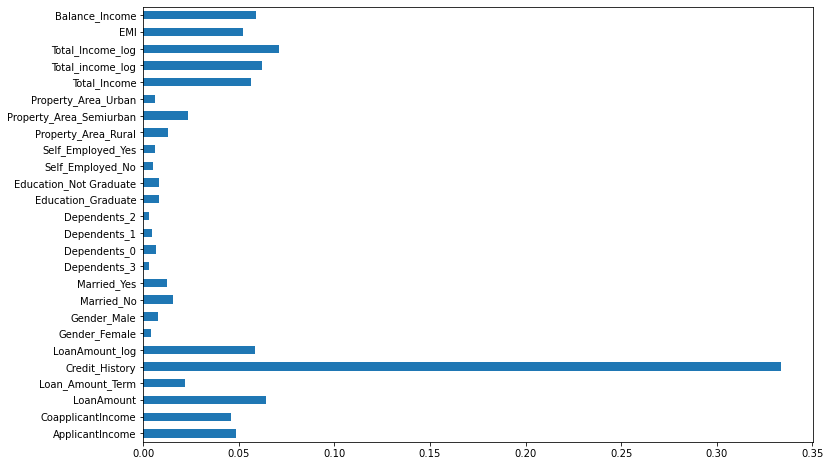

In [288]:
importances=pd.Series(model.feature_importances_,index=X.columns)
importances.plot(kind='barh',figsize=(12,8))

We can see that Credit_History si the most important feature followed by Balance Income, Total Income, EMI. So, feature engineering helped us in predicting our target variables

# XGBOOST

XGBoost is a fat and efficient algorithm and its a boosting algorithm. 
XGBoost works only with numberic variable and we have alreay replaced the categorical variables with numberic variables. 

In [289]:
train.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'],axis=1)
test.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'],axis=1)
X=train.drop('Loan_Status',axis=1)
y=train['Loan_Status']

In [292]:
from xgboost import XGBClassifier
i=1
skf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in skf.split(X,y):
    print('\n{} of kfold {}'.format(i,skf.n_splits))
    Xtr,Xvl=X.iloc[train_index],X.iloc[test_index]
    ytr,yvl=y.iloc[train_index],y.iloc[test_index]
    model=XGBClassifier(random_state=1, max_depth=4, n_estimators=50)
    model.fit(Xtr,ytr)
    pred_test=model.predict(Xvl)
    score=accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1


1 of kfold 5
[10:18:15] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy_score 0.7967479674796748

2 of kfold 5
[10:18:15] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy_score 0.7479674796747967

3 of kfold 5
[10:18:16] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy_score 0.7723577235772358

4 of kfold 5
[10:18:16] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default eva

The mean validaiton accuracy is 0.769

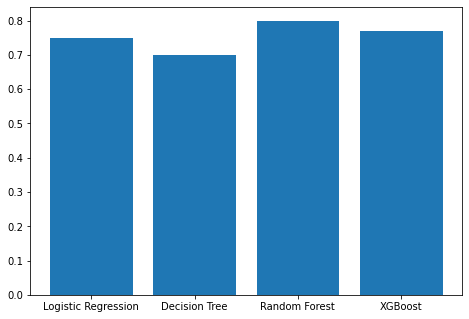

In [293]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
model=['Logistic Regression','Decision Tree','Random Forest','XGBoost']
accuracy=[0.75,0.70,0.80,0.769]
ax.bar(model,accuracy)
plt.show()